# 3. ANOVA

Analysis of variance is a test of means for two or more populations.

Partitions of the total variability in the variable under study to different components.

H0 = Mean1 = Mean2 = -----=Meank

Reject H0 if p value <0.05

Example: To study location of shelf on sales revenue.

One way ANOVA:

Factor, Level, Response

Resonse = y variable

Factor = x variable

Level = Different values of features.

Step1:

    Calculate the sum, average, and number of response for each level of the factor.

Step2:

    Calculate the grand total(T)
    T = Sum of all responses.
Step3:
    
    Calculate the Total Number of Responses(N)
Step4: 
    
    Calculate the Correction factor(CF)
    
    CF = (Grand Total)^2/ Total Number of Responses = T^2/N
    
Step5:

    Calculate Total Sum of Squares (TSS)
    TSS = Sum of Squares of all the responses - CF
    
Step6:
    
    Calculate the Sum of Square of Factor (A)
    SSa = A1^2/nA1 + A2^2/nA2 + A3^2/nA3 - CF
Step7:

    Calculate the Sum of Square of Error (SSe)
    SSe = Total Sum of Squares - Sum of Square of Factors
    SSe = TSS - SSa
Step8:
    
    Calculate the Degree of Freedom (Df)
    Total Df = Total Number of Responses - 1
             = N -1
             
    Df of Factor
        = Number of levels of Factor - 1
        
    Df of Error = Total Df - Df of factors
    
Anova Table:						
						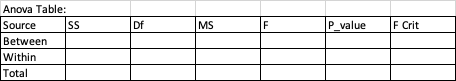
    

    
MS = SS/DF

F of a Factor = MS of Between / MS of within

     F table = finv(probability, df of factor, df of error), probability = 0.05
     p value = fdist(F, df of Factor, df of error)
     
If p value <0.05, then
The factor has significant effect on the process output or response. That is, when the factor is changed from 1 level to another level, there will be significant change in the response.


**Exercise 10**

In [1]:
#import the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as mysb
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
#Import the dataset
data10 = mypd.read_excel('Anova_Coding_Ratio.xlsx')

In [4]:
#Explore the dataset
data10.head()

,Technology,Coding_Ratio
0,J2EE,1.34
1,J2EE,1.89
2,J2EE,1.35
3,J2EE,2.07
4,J2EE,2.41


In [7]:
# Copying the fields to new variable
technology = data10.Technology
cod_ratio = data10.Coding_Ratio

In [8]:
# Develop the regression model
model10 = ols('cod_ratio~C(technology)',data10).fit() #C ensures that technology is categorical variable

In [9]:
# Anova table
anova_table = anova_lm(model10)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(technology),2.0,27.157937,13.578969,14.411102,0.000322
Residual,15.0,14.133862,0.942257,NaN,NaN


p value <0.05. So, technology has influence on coding_ratio

In [10]:
#Group wise average
cod_ratio.groupby(technology).mean()

Technology
C++             1.77250
Informix 4GL    4.38625
J2EE            2.02000
Name: Coding_Ratio, dtype: float64

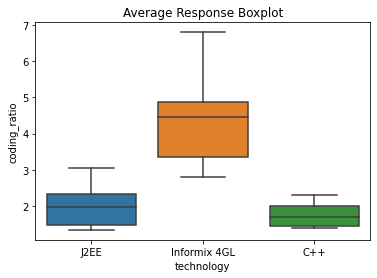

In [11]:
# Groupwise box plot
mysb.boxplot(x = technology,y = cod_ratio)
myplot.title('Average Response Boxplot')
myplot.xlabel('technology')
myplot.ylabel('coding_ratio')
myplot.show()